In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
main_data = pd.read_csv("C:/Users/rajan/Downloads/bumble.csv")

In [92]:
main_data.head()

,age,status,gender,body_type,diet,drinks,education,ethnicity,height,income,job,last_online,location,pets,religion,sign,speaks
0,22,single,m,a little extra,strictly anything,socially,working on college/university,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california",likes dogs and likes cats,agnosticism and very serious about it,gemini,english
1,35,single,m,average,mostly other,often,working on space camp,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california",likes dogs and likes cats,agnosticism but not too serious about it,cancer,"english (fluently), spanish (poorly), french (..."
2,38,available,m,thin,anything,socially,graduated from masters program,NaN,68.0,-1,NaN,2012-06-27-09-10,"san francisco, california",has cats,NaN,pisces but it doesn&rsquo;t matter,"english, french, c++"
3,23,single,m,thin,vegetarian,socially,working on college/university,white,71.0,20000,student,2012-06-28-14-22,"berkeley, california",likes cats,NaN,pisces,"english, german (poorly)"
4,29,single,m,athletic,NaN,socially,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",likes dogs and likes cats,NaN,aquarius,english


In [93]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   status       59946 non-null  object 
 2   gender       59946 non-null  object 
 3   body_type    54650 non-null  object 
 4   diet         35551 non-null  object 
 5   drinks       56961 non-null  object 
 6   education    53318 non-null  object 
 7   ethnicity    54266 non-null  object 
 8   height       59943 non-null  float64
 9   income       59946 non-null  int64  
 10  job          51748 non-null  object 
 11  last_online  59946 non-null  object 
 12  location     59946 non-null  object 
 13  pets         40025 non-null  object 
 14  religion     39720 non-null  object 
 15  sign         48890 non-null  object 
 16  speaks       59896 non-null  object 
dtypes: float64(1), int64(2), object(14)
memory usage: 7.8+ MB


Questions:
1. Which columns in the dataset have missing values, and what percentage of data is missing in each column?

2. Are there columns where more than 50% of the data is missing? Drop those columns where missing values are >50%.

3. Missing numerical data (e.g., height, income) should be handled by imputing the median value of height and income for the corresponding category, such as gender, age group, or location. This ensures that the imputed values are contextually relevant and reduce potential biases in the analysis.

In [94]:
misssing_value = main_data.isnull().sum().sort_values(ascending=False)
missing_Percent = (misssing_value/len(main_data))*100
missing_df = pd.DataFrame({'Missing Value': misssing_value,'Percentage': missing_Percent})
missing_df = missing_df[missing_df['Missing Value']>0]
print(missing_df)

           Missing Value  Percentage
diet               24395   40.694959
religion           20226   33.740366
pets               19921   33.231575
sign               11056   18.443266
job                 8198   13.675641
education           6628   11.056618
ethnicity           5680    9.475194
body_type           5296    8.834618
drinks              2985    4.979482
speaks                50    0.083408
height                 3    0.005005


In [95]:
#As per the requirement there is no column where more than 50% of the data is missing

In [96]:
#replaicing missing height data by the median of height
main_data['height'].fillna(main_data['height'].median(),inplace=True)
misssing_value = main_data.isnull().sum().sort_values(ascending=False)
misssing_value

C:\Users\rajan\AppData\Local\Temp\ipykernel_2588\2759364050.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  main_data['height'].fillna(main_data['height'].median(),inplace=True)


diet           24395
religion       20226
pets           19921
sign           11056
job             8198
education       6628
ethnicity       5680
body_type       5296
drinks          2985
speaks            50
location           0
age                0
last_online        0
income             0
status             0
gender             0
height             0
dtype: int64

Questions:
1. Are there any inconsistencies in the data types across columns (e.g., numerical data stored as strings)?

2. Which columns require conversion to numerical data types for proper analysis (e.g., income)?

3. Does the last_online column need to be converted into a datetime format? What additional insights can be gained by analyzing this as a date field?

In [97]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   status       59946 non-null  object 
 2   gender       59946 non-null  object 
 3   body_type    54650 non-null  object 
 4   diet         35551 non-null  object 
 5   drinks       56961 non-null  object 
 6   education    53318 non-null  object 
 7   ethnicity    54266 non-null  object 
 8   height       59946 non-null  float64
 9   income       59946 non-null  int64  
 10  job          51748 non-null  object 
 11  last_online  59946 non-null  object 
 12  location     59946 non-null  object 
 13  pets         40025 non-null  object 
 14  religion     39720 non-null  object 
 15  sign         48890 non-null  object 
 16  speaks       59896 non-null  object 
dtypes: float64(1), int64(2), object(14)
memory usage: 7.8+ MB


In [98]:
# Ans1 : yes there is inconsenties in data type such as last_online
# Ans 2: No columns requires conversion to numerical data types
# Replace '-' with ':' in time part if needed

# Ensure all values are strings
main_data['last_online'] = main_data['last_online'].astype(str)

# Remove timezone offsets (e.g., "-10:00", "+05:30")
main_data['last_online'] = main_data['last_online'].str.replace(r'([-+]\d{2}:\d{2})$', '', regex=True)

# Convert to datetime
main_data['last_online'] = pd.to_datetime(main_data['last_online'], errors='coerce')

# Verify the conversion
print(main_data.dtypes['last_online'])  # Should now be datetime64[ns]
print(main_data['last_online'].head())  # Check values



C:\Users\rajan\AppData\Local\Temp\ipykernel_2588\3378612434.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  main_data['last_online'] = pd.to_datetime(main_data['last_online'], errors='coerce')


object
0                          NaT
1                          NaT
2    2012-06-27 09:00:00-10:00
3    2012-06-28 14:00:00-22:00
4                          NaT
Name: last_online, dtype: object


C:\Users\rajan\AppData\Local\Temp\ipykernel_2588\3378612434.py:12: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  main_data['last_online'] = pd.to_datetime(main_data['last_online'], errors='coerce')


In [99]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   status       59946 non-null  object 
 2   gender       59946 non-null  object 
 3   body_type    54650 non-null  object 
 4   diet         35551 non-null  object 
 5   drinks       56961 non-null  object 
 6   education    53318 non-null  object 
 7   ethnicity    54266 non-null  object 
 8   height       59946 non-null  float64
 9   income       59946 non-null  int64  
 10  job          51748 non-null  object 
 11  last_online  24051 non-null  object 
 12  location     59946 non-null  object 
 13  pets         40025 non-null  object 
 14  religion     39720 non-null  object 
 15  sign         48890 non-null  object 
 16  speaks       59896 non-null  object 
dtypes: float64(1), int64(2), object(14)
memory usage: 7.8+ MB


Questions:
1. Are there any apparent outliers in numerical columns such as age, height, or income? What are the ranges of values in these columns?

2. Any -1 values in numerical columns like income should be replaced with 0, as they may represent missing or invalid data.

3. For other outliers, rather than deleting them, calculate the mean and median values using only the middle 80% of the data (removing extreme high and low values). This approach ensures that outliers do not disproportionately impact the analysis while retaining as much meaningful data as possible.

In [100]:
# Summary statistics for numerical columns
print(main_data[['age', 'height', 'income']].describe())


                age        height          income
count  59946.000000  59946.000000    59946.000000
mean      32.340290     68.295266    20033.222534
std        9.452779      3.994704    97346.192104
min       18.000000      1.000000       -1.000000
25%       26.000000     66.000000       -1.000000
50%       30.000000     68.000000       -1.000000
75%       37.000000     71.000000       -1.000000
max      110.000000     95.000000  1000000.000000


In [101]:
#calculate outlier for each numerical columns
Q1 = main_data[['age','height','income']].quantile(0.25)
Q3 = main_data[['age','height','income']].quantile(0.75)
IQR = Q3 - Q1

#identify outliers
outliers = (main_data[['age','height','income']] < (Q1 - 1.5 * IQR)) | (main_data[['age','height','income']] > (Q3 + 1.5 * IQR))
outlier_count = outliers.sum()
print(outlier_count)

age        2638
height      285
income    11504
dtype: int64


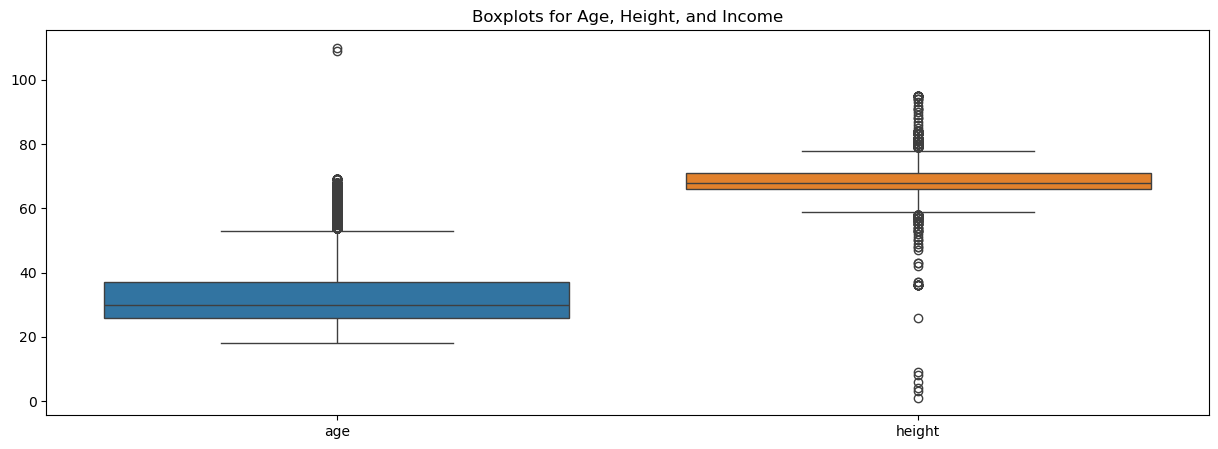

In [109]:
# Plot boxplots for numerical columns to chk the outliers
plt.figure(figsize=(15, 5))
sns.boxplot(data=main_data[['age', 'height']])
plt.title('Boxplots for Age, Height, and Income')
plt.show()


In [110]:
main_data['income'] = main_data['income'].replace(-1,0)
print(main_data['income'].head())

0        0
1    80000
2        0
3    20000
4        0
Name: income, dtype: int64


In [111]:
print(main_data[['age', 'height', 'income']].describe())

                age        height          income
count  59946.000000  59946.000000    59946.000000
mean      32.340290     68.295266    20034.030628
std        9.452779      3.994704    97346.025793
min       18.000000      1.000000        0.000000
25%       26.000000     66.000000        0.000000
50%       30.000000     68.000000        0.000000
75%       37.000000     71.000000        0.000000
max      110.000000     95.000000  1000000.000000


In [105]:
# Function to calculate mean and median after trimming extremes (middle 80%)
def calculate_trimmed_mean_median(data, column):
    # Sort the data for the given column
    sorted_data = data[column].sort_values()
    
    # Remove the bottom 10% and top 10% values (middle 80%)
    trimmed_data = sorted_data[int(len(sorted_data) * 0.1):int(len(sorted_data) * 0.9)]
    
    # Calculate mean and median on the trimmed data
    trimmed_mean = trimmed_data.mean()
    trimmed_median = trimmed_data.median()
    
    return trimmed_mean, trimmed_median

# Apply this function to each column: age, height, income
age_mean, age_median = calculate_trimmed_mean_median(main_data, 'age')
height_mean, height_median = calculate_trimmed_mean_median(main_data, 'height')
income_mean, income_median = calculate_trimmed_mean_median(main_data, 'income')

# Print the results
print(f"Age: Mean = {age_mean}, Median = {age_median}")
print(f"Height: Mean = {height_mean}, Median = {height_median}")
print(f"Income: Mean = {income_mean}, Median = {income_median}")


Age: Mean = 31.085972850678733, Median = 30.0
Height: Mean = 68.32771024042371, Median = 68.0
Income: Mean = 3250.411827261922, Median = 0.0


Create a heatmap to visualize missing values across the dataset. Which columns show consistent missing data patterns?

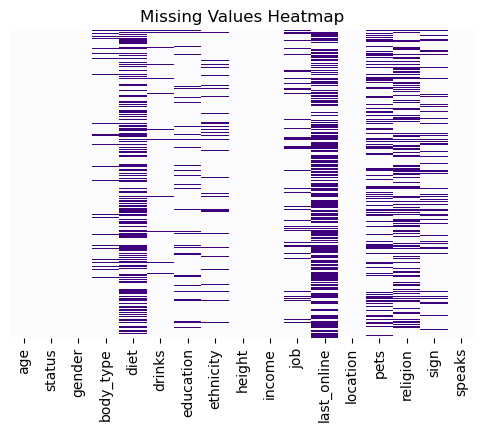

In [106]:
# Generate a boolean mask where True represents missing values
missing_data = main_data.isnull()

# Create a heatmap to visualize missing values, where True (missing data) is purple
plt.figure(figsize=(6, 4))  # Set the figure size
sns.heatmap(missing_data, cbar=False, cmap='Purples', yticklabels=False, xticklabels=True)

# Add title
plt.title('Missing Values Heatmap')

# Show the plot
plt.show()


In [107]:
#dropping a column which was created earlier
main_data = main_data.drop(columns=['age_bracket'],inplace=True)

KeyError: "['age_bracket'] not found in axis"

In [117]:
# Define age bins and labels
bins = [18, 25, 35, 45, np.inf]  # Define the age ranges
labels = ['18-25', '26-35', '36-45', '46+']  # Define the corresponding labels

# Create the new 'age_group' column
main_data['age_group'] = pd.cut(main_data['age'], bins=bins, labels=labels, right=True)
main_data.head()

,age,status,gender,body_type,diet,drinks,education,ethnicity,height,income,job,last_online,location,pets,religion,sign,speaks,age_group
0,22,single,m,a little extra,strictly anything,socially,working on college/university,"asian, white",75.0,0,transportation,NaT,"south san francisco, california",likes dogs and likes cats,agnosticism and very serious about it,gemini,english,18-25
1,35,single,m,average,mostly other,often,working on space camp,white,70.0,80000,hospitality / travel,NaT,"oakland, california",likes dogs and likes cats,agnosticism but not too serious about it,cancer,"english (fluently), spanish (poorly), french (...",26-35
2,38,available,m,thin,anything,socially,graduated from masters program,NaN,68.0,0,NaN,2012-06-27 09:00:00-10:00,"san francisco, california",has cats,NaN,pisces but it doesn&rsquo;t matter,"english, french, c++",36-45
3,23,single,m,thin,vegetarian,socially,working on college/university,white,71.0,20000,student,2012-06-28 14:00:00-22:00,"berkeley, california",likes cats,NaN,pisces,"english, german (poorly)",18-25
4,29,single,m,athletic,NaN,socially,graduated from college/university,"asian, black, other",66.0,0,artistic / musical / writer,NaT,"san francisco, california",likes dogs and likes cats,NaN,aquarius,english,26-35


In [121]:
main_data.head(2)

,age,status,gender,body_type,diet,drinks,education,ethnicity,height,income,job,last_online,location,pets,religion,sign,speaks,age_group,Income_group,profile_completeness
0,22,single,m,a little extra,strictly anything,socially,working on college/university,"asian, white",75.0,NaN,transportation,NaT,"south san francisco, california",likes dogs and likes cats,agnosticism and very serious about it,gemini,english,18-25,0,89.473684
1,35,single,m,average,mostly other,often,working on space camp,white,70.0,80000.0,hospitality / travel,NaT,"oakland, california",likes dogs and likes cats,agnosticism but not too serious about it,cancer,"english (fluently), spanish (poorly), french (...",26-35,Medium Income,94.736842


In [40]:
main_data['income'].describe()

count      11504.000000
mean      104394.993046
std       201433.528307
min        20000.000000
25%        20000.000000
50%        50000.000000
75%       100000.000000
max      1000000.000000
Name: income, dtype: float64

In [118]:
main_data['income'] = main_data['income'].replace(0,np.nan)
income_quartiles = main_data['income'].quantile([0.25,0.5,.75])
low_income = income_quartiles[0.25]
high_income = income_quartiles[0.75]

# Create a new column 'income_group' based on income thresholds
condition = [
    (main_data['income']<=low_income),
    (main_data['income']>low_income) & (main_data['income']<=high_income),
    (main_data['income']>high_income)
]
labels = ['low Income','Medium Income','High Income']

# Assign the new categories to the 'income_group' column
main_data['Income_group'] = np.select(condition,labels)

In [120]:
main_data.head(2)

,age,status,gender,body_type,diet,drinks,education,ethnicity,height,income,job,last_online,location,pets,religion,sign,speaks,age_group,Income_group,profile_completeness
0,22,single,m,a little extra,strictly anything,socially,working on college/university,"asian, white",75.0,NaN,transportation,NaT,"south san francisco, california",likes dogs and likes cats,agnosticism and very serious about it,gemini,english,18-25,0,89.473684
1,35,single,m,average,mostly other,often,working on space camp,white,70.0,80000.0,hospitality / travel,NaT,"oakland, california",likes dogs and likes cats,agnosticism but not too serious about it,cancer,"english (fluently), spanish (poorly), french (...",26-35,Medium Income,94.736842


Create a new feature, profile_completeness, by calculating the percentage of non-missing values for each user profile. How complete are most user profiles, and how does completeness vary across demographics?

In [119]:
# Calculate the profile completeness for each user (percentage of non-missing values)
profile_completeness = main_data.notna().mean(axis=1) * 100
# Add the new column to the DataFrame
main_data['profile_completeness'] = profile_completeness

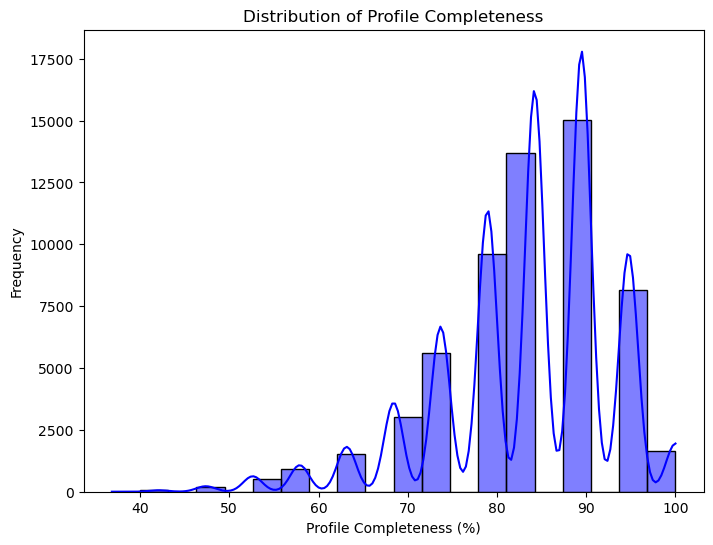

Profile Completeness by Age Group:
age_group
18-25    83.235661
26-35    83.147634
36-45    83.754513
46+      84.633799
Name: profile_completeness, dtype: float64

Profile Completeness by Income Group:
income
20000.0      91.623877
30000.0      91.216352
40000.0      90.908615
50000.0      90.790823
60000.0      90.517735
70000.0      90.344674
80000.0      90.279028
100000.0     90.045131
150000.0     89.874051
250000.0     87.848817
500000.0     88.486842
1000000.0    90.655622
Name: profile_completeness, dtype: float64


C:\Users\rajan\AppData\Local\Temp\ipykernel_18888\402665424.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  completeness_by_age = main_data.groupby('age_group')['profile_completeness'].mean()
C:\Users\rajan\AppData\Local\Temp\ipykernel_18888\402665424.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=completeness_by_age.index, y=completeness_by_age.values, palette='Set2')


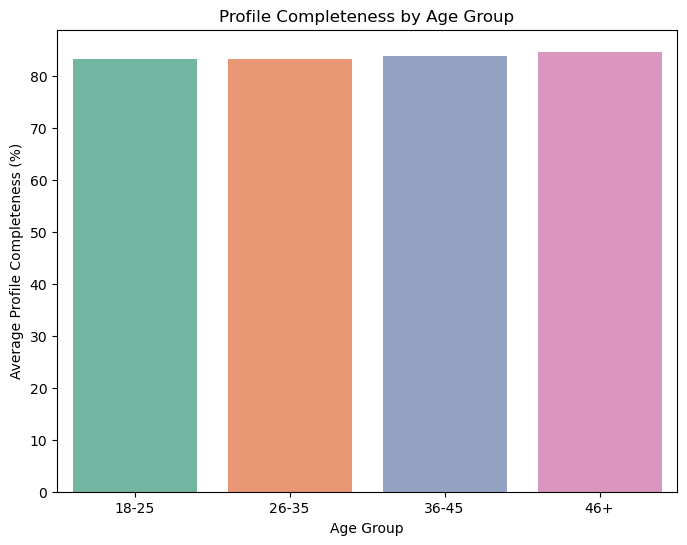

C:\Users\rajan\AppData\Local\Temp\ipykernel_18888\402665424.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=completeness_by_income.index, y=completeness_by_income.values, palette='Set2')


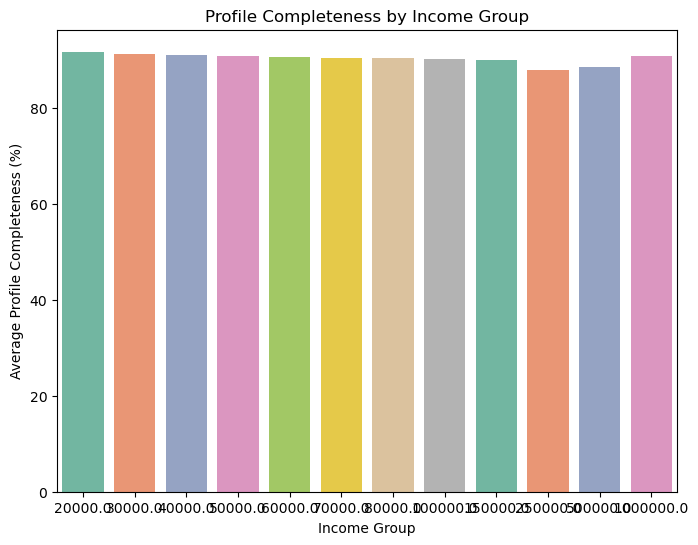

In [58]:

# Check the distribution of profile completeness
plt.figure(figsize=(8, 6))
sns.histplot(main_data['profile_completeness'], kde=True, color='blue', bins=20)
plt.title('Distribution of Profile Completeness')
plt.xlabel('Profile Completeness (%)')
plt.ylabel('Frequency')
plt.show()

# Explore completeness across demographics (age group and income group)
completeness_by_age = main_data.groupby('age_group')['profile_completeness'].mean()
completeness_by_income = main_data.groupby('income')['profile_completeness'].mean()

# Display the results
print(f"Profile Completeness by Age Group:\n{completeness_by_age}")
print(f"\nProfile Completeness by Income Group:\n{completeness_by_income}")

# Plot completeness by age group
plt.figure(figsize=(8, 6))
sns.barplot(x=completeness_by_age.index, y=completeness_by_age.values, palette='Set2')
plt.title('Profile Completeness by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Profile Completeness (%)')
plt.show()

# Plot completeness by income group
plt.figure(figsize=(8, 6))
sns.barplot(x=completeness_by_income.index, y=completeness_by_income.values, palette='Set2')
plt.title('Profile Completeness by Income Group')
plt.xlabel('Income Group')
plt.ylabel('Average Profile Completeness (%)')
plt.show()

Convert the height column from inches to centimeters using the conversion factor (1 inch = 2.54 cm). Store the converted values in a new column, height_cm.

In [66]:
main_data['converted_height_cm'] = main_data['height'] * 2.54

In [ ]:
#main_data = main_data.drop(columns=['converted_height_cm'])

In [122]:
main_data.head()

,age,status,gender,body_type,diet,drinks,education,ethnicity,height,income,job,last_online,location,pets,religion,sign,speaks,age_group,Income_group,profile_completeness
0,22,single,m,a little extra,strictly anything,socially,working on college/university,"asian, white",75.0,NaN,transportation,NaT,"south san francisco, california",likes dogs and likes cats,agnosticism and very serious about it,gemini,english,18-25,0,89.473684
1,35,single,m,average,mostly other,often,working on space camp,white,70.0,80000.0,hospitality / travel,NaT,"oakland, california",likes dogs and likes cats,agnosticism but not too serious about it,cancer,"english (fluently), spanish (poorly), french (...",26-35,Medium Income,94.736842
2,38,available,m,thin,anything,socially,graduated from masters program,NaN,68.0,NaN,NaN,2012-06-27 09:00:00-10:00,"san francisco, california",has cats,NaN,pisces but it doesn&rsquo;t matter,"english, french, c++",36-45,0,78.947368
3,23,single,m,thin,vegetarian,socially,working on college/university,white,71.0,20000.0,student,2012-06-28 14:00:00-22:00,"berkeley, california",likes cats,NaN,pisces,"english, german (poorly)",18-25,low Income,94.736842
4,29,single,m,athletic,NaN,socially,graduated from college/university,"asian, black, other",66.0,NaN,artistic / musical / writer,NaT,"san francisco, california",likes dogs and likes cats,NaN,aquarius,english,26-35,0,78.947368



Demographic Analysis
1. What is the gender distribution (gender) across the platform? Are there any significant imbalances?

2. What are the proportions of users in different status categories (e.g., single, married, seeing someone)? What does this suggest about the platform’s target audience?

3. How does status vary by gender? For example, what proportion of men and women identify as single?

gender
m    35829
f    24117
Name: count, dtype: int64


C:\Users\rajan\AppData\Local\Temp\ipykernel_18888\392485733.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=gender_distribution.index,y=gender_distribution.values,palette='Set2')


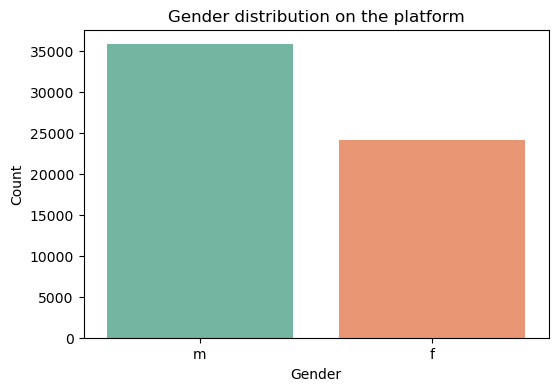

In [87]:
# Count the number of occurrences for each gender
gender_distribution = main_data['gender'].value_counts()
print(gender_distribution)
plt.figure(figsize=(6,4))
sns.barplot(x=gender_distribution.index,y=gender_distribution.values,palette='Set2')
plt.title('Gender distribution on the platform')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [91]:
status_category = main_data['status'].value_counts()
status_category
# Convert counts to percentages
status_percentage = (status_category / status_category.sum()) * 100

# Display the counts and percentages
print(pd.DataFrame({'Count': status_category, 'Percentage': status_percentage.round(2)}))

                Count  Percentage
status                           
single          55697       92.91
seeing someone   2064        3.44
available        1865        3.11
married           310        0.52
unknown            10        0.02


In [98]:
#status_by_gender = main_data['status'].corr(main_data['gender'])
status_by_gender = main_data.groupby('gender')['status'].value_counts(normalize = True).unstack() * 100
status_by_gender.round(2)

status,available,married,seeing someone,single,unknown
gender,,,,,
f,2.72,0.56,4.16,92.54,0.02
m,3.37,0.49,2.96,93.16,0.02


Questions:
1. What are the correlations between numerical columns such as age, income, gender Are there any strong positive or negative relationships?

2. How does age correlate with income? Are older users more likely to report higher income levels?

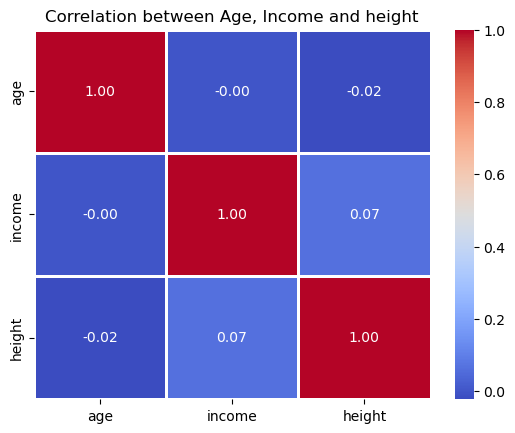

In [34]:
correlation_matrix = main_data[['age','income','height']].corr()

plt.Figure(figsize=(8,4))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt = '.2f',linewidths=1)
plt.title("Correlation between Age, Income and height")
plt.show()

Questions:
How do dietary preferences (diet) distribute across the platform? For example, what percentage of users identify as vegetarian, vegan, or follow "anything" diets?

How do drinking habits (drinks) vary across different diet categories? Are users with stricter diets (e.g., vegan) less likely to drink?

In [123]:
main_data.head(2)

,age,status,gender,body_type,diet,drinks,education,ethnicity,height,income,job,last_online,location,pets,religion,sign,speaks,age_group,Income_group,profile_completeness
0,22,single,m,a little extra,strictly anything,socially,working on college/university,"asian, white",75.0,NaN,transportation,NaT,"south san francisco, california",likes dogs and likes cats,agnosticism and very serious about it,gemini,english,18-25,0,89.473684
1,35,single,m,average,mostly other,often,working on space camp,white,70.0,80000.0,hospitality / travel,NaT,"oakland, california",likes dogs and likes cats,agnosticism but not too serious about it,cancer,"english (fluently), spanish (poorly), french (...",26-35,Medium Income,94.736842


In [52]:
dietary_preferences = main_data['diet'].value_counts()
dietary_preferences_percentage = (dietary_preferences/dietary_preferences.sum())*100

print(pd.DataFrame({'Count':dietary_preferences, '%_Age':dietary_preferences_percentage}))

                     Count      %_Age
diet                                 
mostly anything      16585  46.651290
anything              6183  17.391916
strictly anything     5113  14.382155
mostly vegetarian     3444   9.687491
mostly other          1007   2.832550
strictly vegetarian    875   2.461253
vegetarian             667   1.876178
strictly other         452   1.271413
mostly vegan           338   0.950747
other                  331   0.931057
strictly vegan         228   0.641332
vegan                  136   0.382549
mostly kosher           86   0.241906
mostly halal            48   0.135017
strictly halal          18   0.050631
strictly kosher         18   0.050631
halal                   11   0.030941
kosher                  11   0.030941


In [54]:
print(main_data['drinks'].unique())
print(main_data['diet'].unique())

['socially' 'often' 'not at all' 'rarely' nan 'very often' 'desperately']
['strictly anything' 'mostly other' 'anything' 'vegetarian' nan
 'mostly anything' 'mostly vegetarian' 'strictly vegan'
 'strictly vegetarian' 'mostly vegan' 'strictly other' 'mostly halal'
 'other' 'vegan' 'mostly kosher' 'strictly halal' 'halal'
 'strictly kosher' 'kosher']


In [ ]:
drinks_diet_distribution = main_data.groupby('diet')['drinks'].value_counts(normalize=True).unstack()*100
drinks_diet_distribution

drinks,desperately,not at all,often,rarely,socially,very often
diet,,,,,,
anything,0.350467,4.923231,9.579439,8.511348,75.667557,0.967957
halal,NaN,44.444444,11.111111,NaN,44.444444,NaN
kosher,NaN,9.090909,NaN,18.181818,63.636364,9.090909
mostly anything,0.406479,5.185687,8.536060,9.466034,75.611258,0.794482
mostly halal,6.976744,23.255814,4.651163,18.604651,37.209302,9.302326
mostly kosher,1.190476,8.333333,4.761905,20.238095,59.523810,5.952381
mostly other,0.820513,9.333333,5.025641,18.051282,66.256410,0.512821
mostly vegan,0.621118,12.422360,6.832298,19.254658,59.937888,0.931677
mostly vegetarian,0.572117,5.871725,7.015959,14.031918,71.906052,0.602228


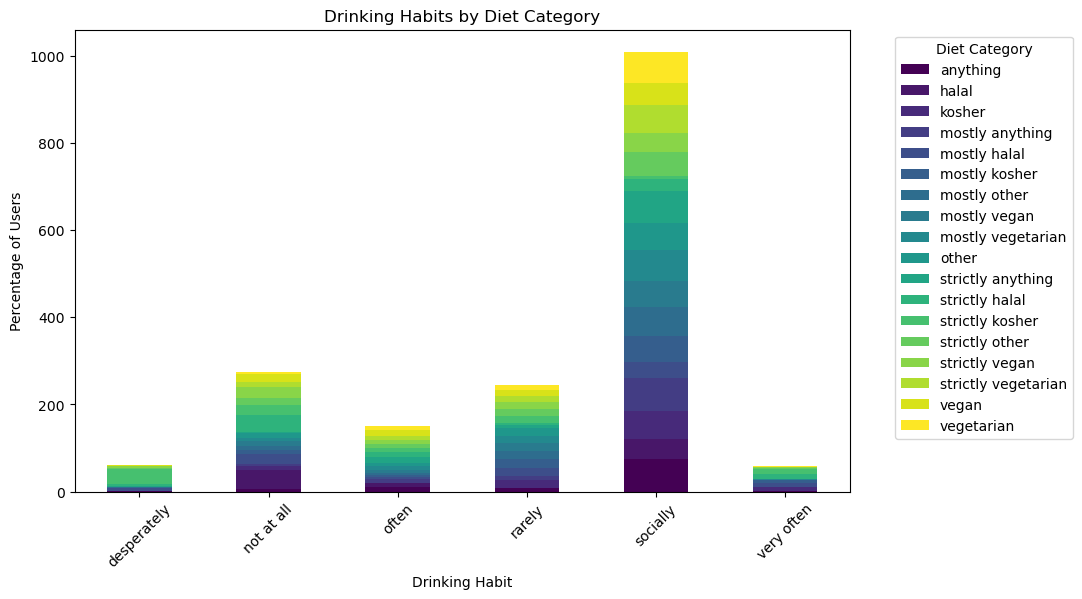

In [ ]:
drinks_diet_distribution.T.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.xlabel("Drinking Habit")
plt.ylabel("Percentage of Users")
plt.title("Drinking Habits by Diet Category")
plt.legend(title="Diet Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()


Questions:
Extract city and state information from the location column. What are the top 5 cities and states with the highest number of users?

How does age vary across the top cities? Are certain cities dominated by younger or older users?

What are the average income levels in the top states or cities? Are there regional patterns in reported income?



In [65]:
#Check how many columns str.split() is generating
main_data['location'].str.split(',').str.len().value_counts()

location
2    59945
3        1
Name: count, dtype: int64

In [125]:
# Ensure location column has valid values
main_data['location'] = main_data['location'].fillna('Unknown, Unknown')

# Split into two columns (City, State), keeping only the first two parts
split_location = main_data['location'].str.split(',', n=1, expand=True)

# Rename columns
split_location.columns = ['city', 'state']

# Assign back to main_data

main_data[['city', 'state']] = split_location


In [126]:
main_data.head()

,age,status,gender,body_type,diet,drinks,education,ethnicity,height,income,...,location,pets,religion,sign,speaks,age_group,Income_group,profile_completeness,city,state
0,22,single,m,a little extra,strictly anything,socially,working on college/university,"asian, white",75.0,NaN,...,"south san francisco, california",likes dogs and likes cats,agnosticism and very serious about it,gemini,english,18-25,0,89.473684,south san francisco,california
1,35,single,m,average,mostly other,often,working on space camp,white,70.0,80000.0,...,"oakland, california",likes dogs and likes cats,agnosticism but not too serious about it,cancer,"english (fluently), spanish (poorly), french (...",26-35,Medium Income,94.736842,oakland,california
2,38,available,m,thin,anything,socially,graduated from masters program,NaN,68.0,NaN,...,"san francisco, california",has cats,NaN,pisces but it doesn&rsquo;t matter,"english, french, c++",36-45,0,78.947368,san francisco,california
3,23,single,m,thin,vegetarian,socially,working on college/university,white,71.0,20000.0,...,"berkeley, california",likes cats,NaN,pisces,"english, german (poorly)",18-25,low Income,94.736842,berkeley,california
4,29,single,m,athletic,NaN,socially,graduated from college/university,"asian, black, other",66.0,NaN,...,"san francisco, california",likes dogs and likes cats,NaN,aquarius,english,26-35,0,78.947368,san francisco,california


In [127]:
top_cities = main_data['city'].value_counts().head(5)
top_states = main_data['state'].value_counts().head(5)
print("Top 5 Cities with the Highest Number of Users:")
print(top_cities)

print("\nTop 5 States with the Highest Number of Users:")
print(top_states)



Top 5 Cities with the Highest Number of Users:
city
san francisco    31064
oakland           7214
berkeley          4212
san mateo         1331
palo alto         1064
Name: count, dtype: int64

Top 5 States with the Highest Number of Users:
state
california       59855
new york            17
illinois             8
massachusetts        5
texas                4
Name: count, dtype: int64


C:\Users\rajan\AppData\Local\Temp\ipykernel_2588\3938037307.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='city',y='age',data = top_cities_data, order=top_cities,palette='viridis')


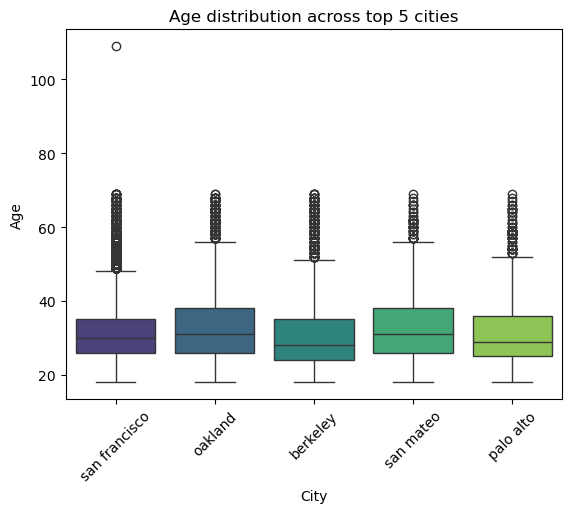

In [128]:
#How does age vary across the top cities? Are certain cities dominated by younger or older users?
top_cities = main_data['city'].value_counts().head(5).index
top_cities_data = main_data[main_data['city'].isin(top_cities)]

#Visualisation
plt.Figure(figsize=(6,4))
sns.boxplot(x='city',y='age',data = top_cities_data, order=top_cities,palette='viridis')
plt.xlabel('City')
plt.ylabel('Age')
plt.title('Age distribution across top 5 cities')
plt.xticks(rotation=45)
plt.show()

In [129]:
top_cities = main_data['city'].value_counts().head(5).index
top_states = main_data['state'].value_counts().head(5).index
top_cities_data = main_data[main_data['city'].isin(top_cities)]
top_states_data = main_data[main_data['state'].isin(top_states)]
avg_income_cities = top_cities_data.groupby('city')['income'].mean().sort_values(ascending=False)
print(avg_income_cities)
avg_income_states = top_states_data.groupby('state')['income'].mean().sort_values(ascending=False)
print(avg_income_states)


city
san francisco    122926.158680
oakland          105054.803353
palo alto        104416.243655
berkeley          98571.428571
san mateo         95345.911950
Name: income, dtype: float64
state
new york         270000.00000
california       104425.97267
massachusetts     30000.00000
texas             20000.00000
illinois                  NaN
Name: income, dtype: float64


Questions:
What is the average height of users across different gender categories?

How does height vary by age_group? Are there noticeable trends among younger vs. older users?

What is the distribution of height within body_type categories (e.g., athletic, curvy, thin)? Do the distributions align with expectations?



In [130]:
#What is the average height of users across different gender categories?
average_height = main_data.groupby('gender')['height'].mean()
print(pd.DataFrame(average_height))

           height
gender           
f       65.103993
m       70.443356


In [135]:
#How does height vary by age_group? Are there noticeable trends among younger vs. older users?
height_by_age_group = main_data.groupby('age_group')['height'].mean()
height_by_age_group

C:\Users\rajan\AppData\Local\Temp\ipykernel_2588\2902424548.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  height_by_age_group = main_data.groupby('age_group')['height'].mean()


age_group
18-25    68.224390
26-35    68.406869
36-45    68.325095
46+      67.940837
Name: height, dtype: float64

In [138]:
#What is the distribution of height within body_type categories (e.g., athletic, curvy, thin)? 
# Do the distributions align with expectations?
height_dis_body_type = main_data.groupby('body_type')['height'].describe()
height_dis_body_type


,count,mean,std,min,25%,50%,75%,max
body_type,,,,,,,,
a little extra,2629.0,68.820084,3.930905,55.0,66.0,69.0,72.00,85.0
athletic,11819.0,69.707336,3.593712,3.0,67.0,70.0,72.00,95.0
average,14652.0,68.100805,3.850883,36.0,65.0,68.0,71.00,95.0
curvy,3924.0,65.210245,3.021022,36.0,63.0,65.0,67.00,95.0
fit,12711.0,68.546062,3.767420,9.0,66.0,69.0,71.00,95.0
full figured,1009.0,66.464817,3.352475,58.0,64.0,66.0,68.00,80.0
jacked,421.0,69.292162,5.871453,37.0,66.0,70.0,72.00,95.0
overweight,444.0,68.948198,4.225529,59.0,66.0,69.0,72.00,95.0
rather not say,198.0,67.272727,4.756653,59.0,64.0,67.0,70.75,95.0


Questions:
What is the distribution of income across the platform? Are there specific income brackets that dominate? (don't count 0)

How does income vary by age_group and gender? Are older users more likely to report higher incomes?



In [147]:
#What is the distribution of income across the platform? Are there specific income brackets that dominate? (don't count 0)
income_distribution = main_data[main_data['income'] > 0].groupby('Income_group')['income'].describe()
income_distribution


,count,mean,std,min,25%,50%,75%,max
Income_group,,,,,,,,
High Income,1349.0,501779.095626,401088.772456,150000.0,150000.0,250000.0,1000000.0,1000000.0
Medium Income,7203.0,64559.211440,24721.934560,30000.0,40000.0,60000.0,80000.0,100000.0
low Income,2952.0,20000.000000,0.000000,20000.0,20000.0,20000.0,20000.0,20000.0


C:\Users\rajan\AppData\Local\Temp\ipykernel_2588\3900751209.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_by_age_gender = main_data.groupby(['age_group', 'gender'])['income'].mean().reset_index()


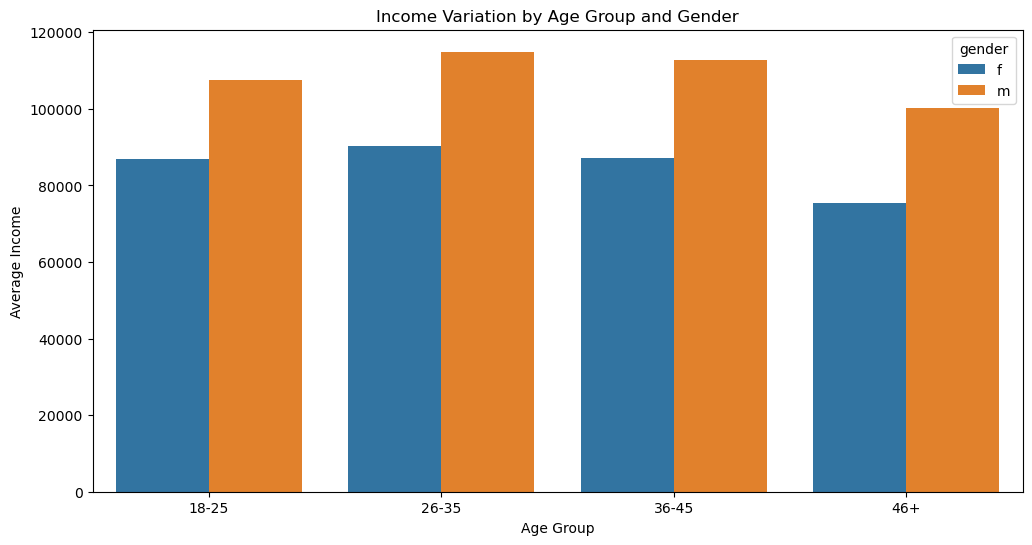

,age_group,gender,income
0,18-25,f,86964.504284
1,18-25,m,107654.802535
2,26-35,f,90398.126464
3,26-35,m,114944.801027
4,36-45,f,87302.977233
5,36-45,m,112680.608365
6,46+,f,75299.760192
7,46+,m,100156.626506


In [151]:
#How does income vary by age_group and gender? Are older users more likely to report higher incomes?
income_by_age_gender = main_data.groupby(['age_group', 'gender'])['income'].mean().reset_index()
# Plotting income by age group and gender
plt.figure(figsize=(12, 6))
sns.barplot(x='age_group', y='income', hue='gender', data=income_by_age_gender)
plt.title('Income Variation by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Average Income')
plt.show()

# Display the income by age group and gender statistics
income_by_age_gender

Questions:
Plot a histogram of age with a vertical line indicating the mean age. What does the distribution reveal about the most common age group on the platform?

How does the age distribution differ by gender? Are there age groups where one gender is more prevalent?



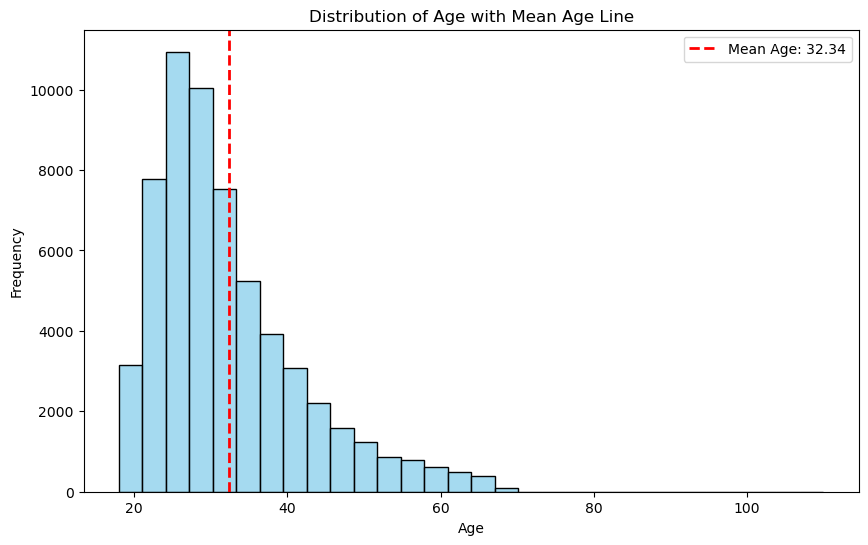

In [152]:
#Plot a histogram of age with a vertical line indicating the mean age. 
# What does the distribution reveal about the most common age group on the platform?
# Plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(main_data['age'], bins=30, kde=False, color='skyblue', edgecolor='black')

# Calculate the mean age
mean_age = main_data['age'].mean()

# Adding a vertical line for the mean age
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=2, label=f'Mean Age: {mean_age:.2f}')

# Adding labels and title
plt.title('Distribution of Age with Mean Age Line')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()

# Display the plot
plt.show()

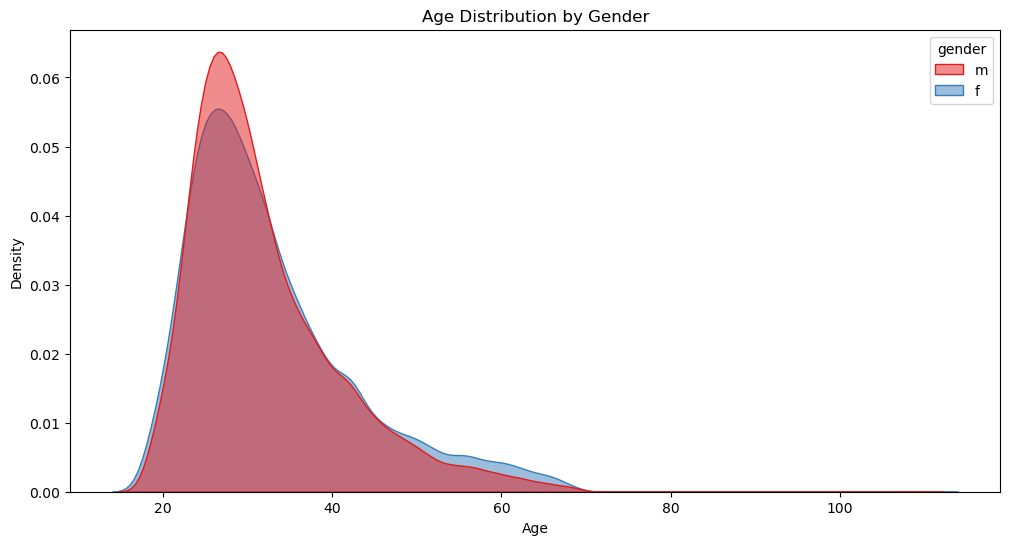

In [155]:
#How does the age distribution differ by gender? Are there age groups where one gender is more prevalent?
plt.figure(figsize=(12, 6))

# Plotting the age distribution by gender using KDE
sns.kdeplot(data=main_data, x='age', hue='gender', fill=True, common_norm=False, palette='Set1', alpha=0.5)

# Adding labels and title
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Density')

# Display the plot
plt.show()


Use a scatterplot to visualize the relationship between income and age, with a trend line indicating overall patterns. Are older users more likely to report higher incomes?

Create boxplots of income grouped by age_group. Which age group reports the highest median income?

Analyze income levels within gender and status categories. For example, are single men more likely to report higher incomes than single women?

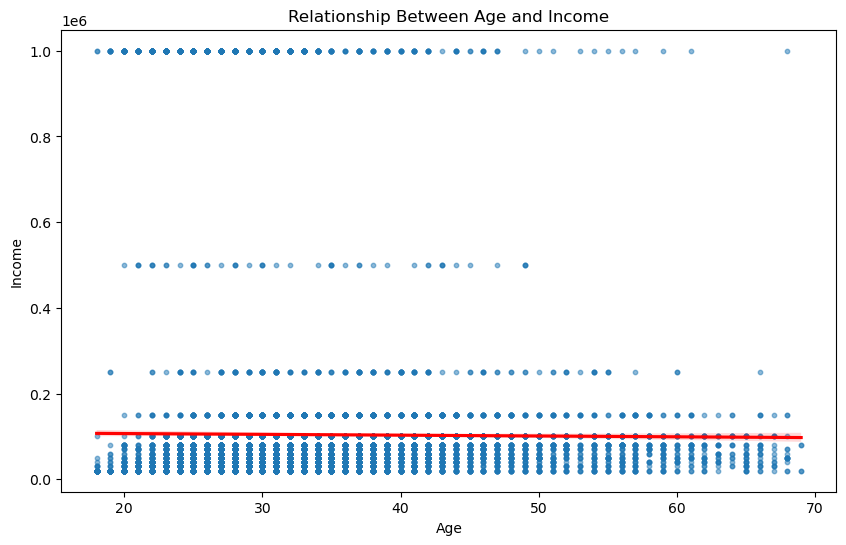

In [156]:
#Use a scatterplot to visualize the relationship between income and age, with a trend line indicating overall patterns. 
# Are older users more likely to report higher incomes?
plt.figure(figsize=(10, 6))

# Scatterplot with trend line
sns.regplot(x='age', y='income', data=main_data, scatter_kws={'s': 10, 'alpha': 0.5}, line_kws={'color': 'red'})

# Adding labels and title
plt.title('Relationship Between Age and Income')
plt.xlabel('Age')
plt.ylabel('Income')

# Display the plot
plt.show()

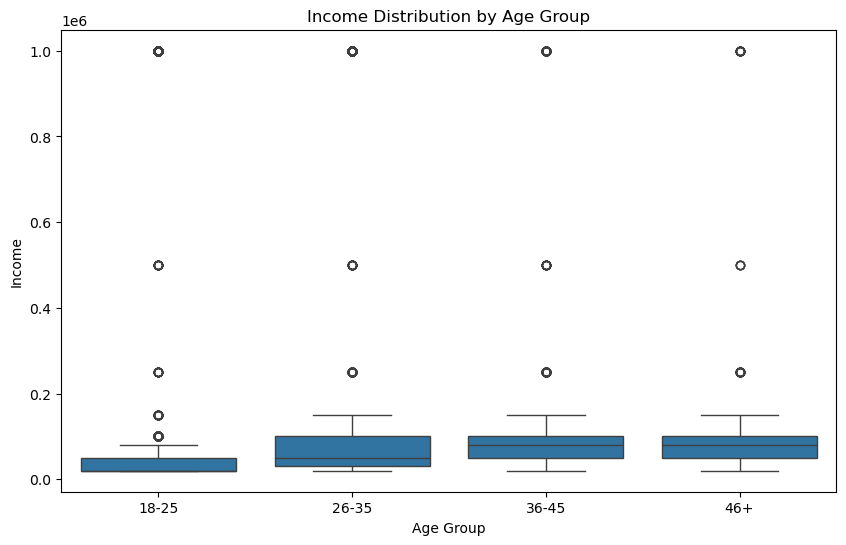

In [157]:
#Create boxplots of income grouped by age_group. Which age group reports the highest median income?
plt.figure(figsize=(10, 6))

# Create a boxplot of income grouped by age_group
sns.boxplot(x='age_group', y='income', data=main_data)

# Adding labels and title
plt.title('Income Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Income')

# Display the plot
plt.show()

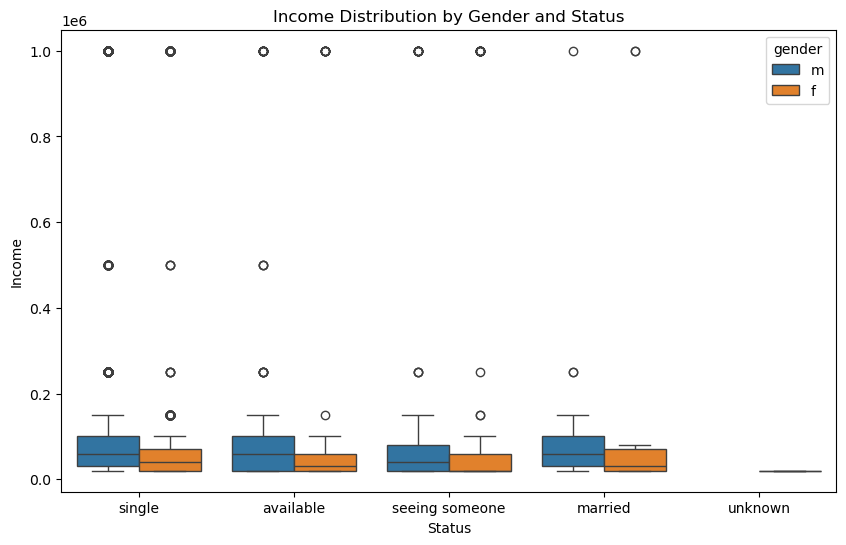

In [159]:
#Analyze income levels within gender and status categories. 
# For example, are single men more likely to report higher incomes than single women?
# Grouping the data by gender and status, calculating the median income for each group
income_by_gender_status = main_data.groupby(['gender', 'status'])['income'].median().reset_index()

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a boxplot for income by gender and status
sns.boxplot(x='status', y='income', hue='gender', data=main_data)

# Adding labels and title
plt.title('Income Distribution by Gender and Status')
plt.xlabel('Status')
plt.ylabel('Income')

# Display the plot
plt.show()

Questions:
Create a bar chart showing the distribution of pets categories (e.g., likes dogs, likes cats). Which preferences are most common?

How do pets preferences vary across gender and age_group? Are younger users more likely to report liking pets compared to older users?

C:\Users\rajan\AppData\Local\Temp\ipykernel_2588\3915238242.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pet_counts.index, y=pet_counts.values, palette='Set2')


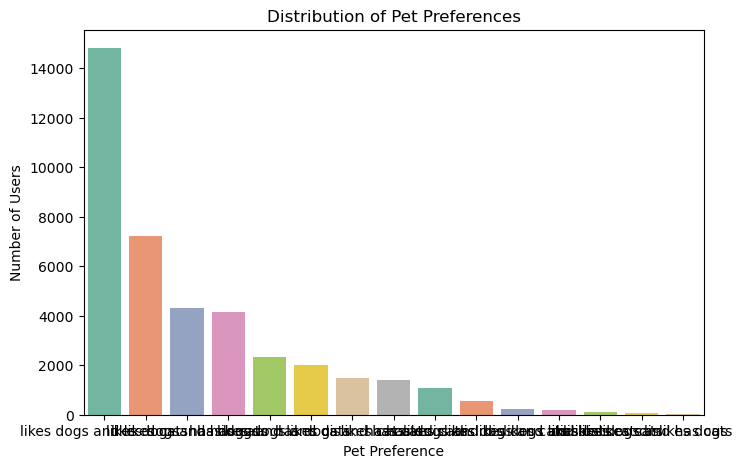

pets
likes dogs and likes cats          14814
likes dogs                          7224
likes dogs and has cats             4313
has dogs                            4134
has dogs and likes cats             2333
likes dogs and dislikes cats        2029
has dogs and has cats               1474
has cats                            1406
likes cats                          1063
has dogs and dislikes cats           552
dislikes dogs and likes cats         240
dislikes dogs and dislikes cats      196
dislikes cats                        122
dislikes dogs and has cats            81
dislikes dogs                         44
Name: count, dtype: int64


In [160]:
#Create a bar chart showing the distribution of pets categories (e.g., likes dogs, likes cats). 
# Which preferences are most common?
# Assuming 'pets' is the column that contains pet preferences
# Count the occurrences of each pet preference
pet_counts = main_data['pets'].value_counts()

# Set the figure size
plt.figure(figsize=(8, 5))

# Create a bar chart for pet preferences
sns.barplot(x=pet_counts.index, y=pet_counts.values, palette='Set2')

# Adding labels and title
plt.title('Distribution of Pet Preferences')
plt.xlabel('Pet Preference')
plt.ylabel('Number of Users')

# Display the plot
plt.show()

# Display the pet counts
print(pet_counts)

C:\Users\rajan\AppData\Local\Temp\ipykernel_2588\4065060407.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pet_gender_age_group = main_data.groupby(['gender', 'age_group', 'pets']).size().reset_index(name='count')
C:\Users\rajan\AppData\Local\Temp\ipykernel_2588\4065060407.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='age_group', y='count', hue='gender', data=pet_gender_age_group, ci=None, palette='Set2', hue_order=['Male', 'Female'])


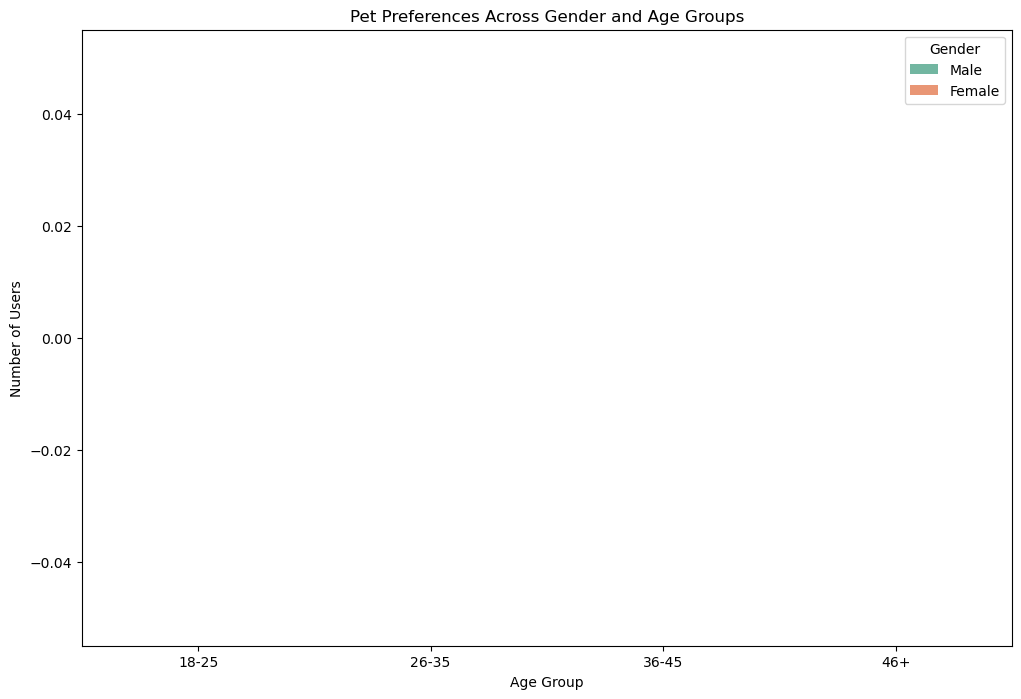

    gender age_group                             pets  count
0        f     18-25                    dislikes cats     10
1        f     18-25                    dislikes dogs      5
2        f     18-25  dislikes dogs and dislikes cats     25
3        f     18-25       dislikes dogs and has cats     10
4        f     18-25     dislikes dogs and likes cats     26
..     ...       ...                              ...    ...
115      m       46+                       likes cats     78
116      m       46+                       likes dogs    316
117      m       46+     likes dogs and dislikes cats     69
118      m       46+          likes dogs and has cats    230
119      m       46+        likes dogs and likes cats    911

[120 rows x 4 columns]


In [161]:
#How do pets preferences vary across gender and age_group? 
# Are younger users more likely to report liking pets compared to older users?
# Group by gender, age_group, and pets, then count occurrences
pet_gender_age_group = main_data.groupby(['gender', 'age_group', 'pets']).size().reset_index(name='count')

# Set up the figure size
plt.figure(figsize=(12, 8))

# Create a barplot with gender and age group on the x-axis and pet preference counts on the y-axis
sns.barplot(x='age_group', y='count', hue='gender', data=pet_gender_age_group, ci=None, palette='Set2', hue_order=['Male', 'Female'])

# Adding title and labels
plt.title('Pet Preferences Across Gender and Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Users')
plt.legend(title='Gender', loc='upper right')

# Display the plot
plt.show()

# Print the grouped data for inspection
print(pet_gender_age_group)

Questions:
Create a pie chart showing the distribution of zodiac signs (sign) across the platform. Which signs are most and least represented? Is this the right chart? If not, replace with right chart.

How does sign vary across gender and status? Are there noticeable patterns or imbalances?

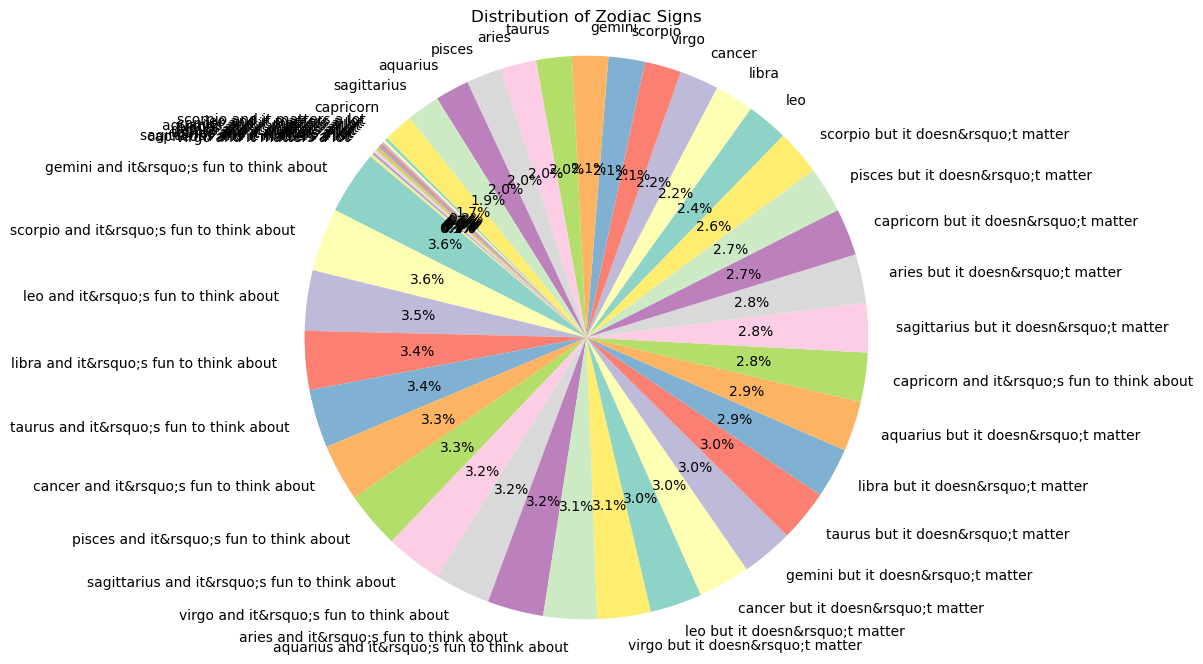

In [162]:
#Create a pie chart showing the distribution of zodiac signs (sign) across the platform. 
# Which signs are most and least represented? Is this the right chart? If not, replace with right chart.
# Count the occurrences of each zodiac sign
zodiac_counts = main_data['sign'].value_counts()

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(zodiac_counts, labels=zodiac_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set3', len(zodiac_counts)))

# Title and display
plt.title('Distribution of Zodiac Signs')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


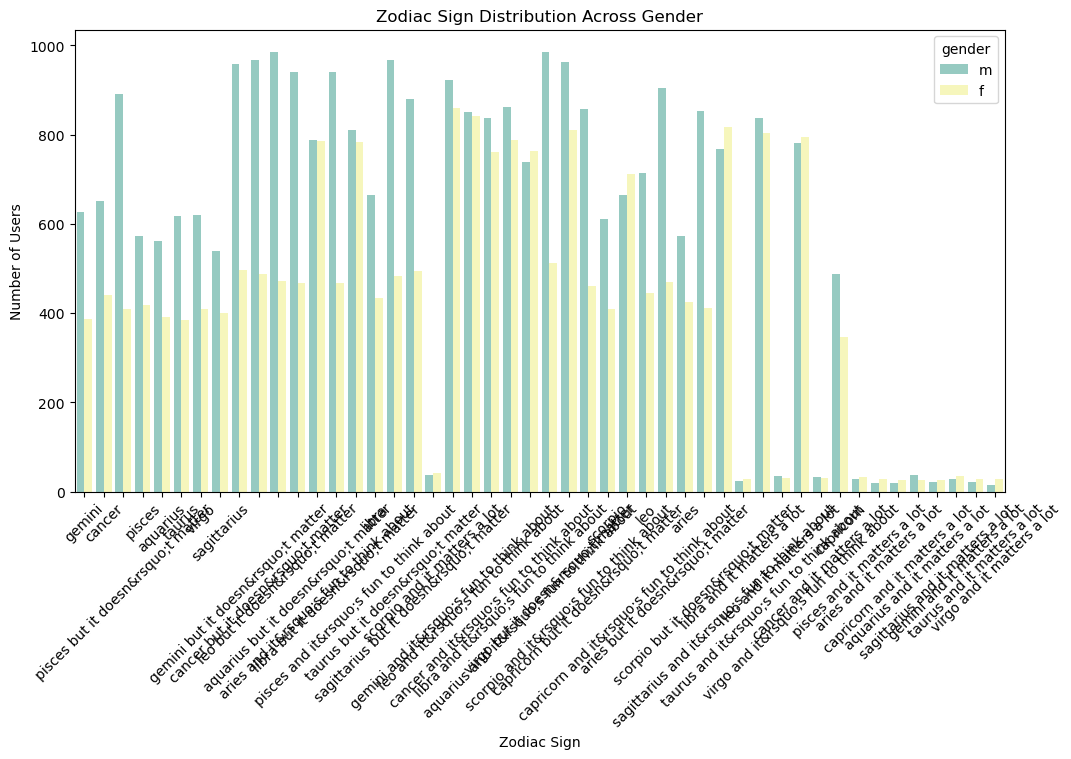

In [164]:
#How does sign vary across gender and status? Are there noticeable patterns or imbalances?
# Plot a countplot for zodiac sign distribution across gender
plt.figure(figsize=(12, 6))
sns.countplot(x='sign', hue='gender', data=main_data, palette='Set3')

# Adding labels and title
plt.title('Zodiac Sign Distribution Across Gender')
plt.xlabel('Zodiac Sign')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()
